## Examples of using Transformation class

Author: Dimitris Giovanis, Michael Shields

Date: 12/4/2018

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Correlate, Decorrelate, Nataf, InvNataf
import numpy as np
import matplotlib.pyplot as plt

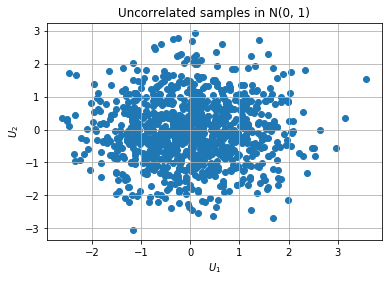

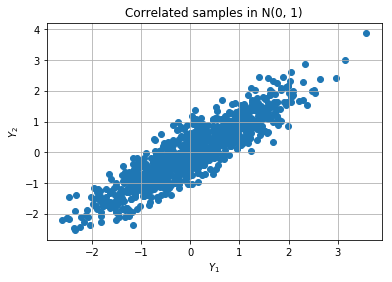

Caution: The samples provided must be uncorrelated standard normal random variables.


In [2]:
# Example 1: 
#In this example, the class 'Correlate' is employed to correlate standard normal samples 
#generated with the UQpy MCS class. 

# Generate uncorrelated standard normal samples using MCS class
x = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

# Correlate the samples according to the following correlation matrix
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
y = Correlate(x, corr_norm=Rho)

plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y.samples[:, 0], y.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

# When samples are provided as an array
x_a = x.samples
y0 = Correlate(x_a, corr_norm=Rho, dimension=2)

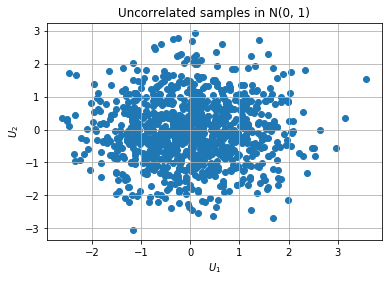

In [3]:
# Example 2: 
#In this example, the class 'Decorrelate' is employed to decorrelate the correlated standard normal samples 
#generated in the previous example. 

# Decorrelate standard normal samples using MCS class
q = Decorrelate(y, corr_norm=Rho)


# Plot the uncorrelated samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(q.samples[:, 0], q.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()


UQpy: Computing Nataf correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[1.         0.31649732]
 [0.31649732 1.        ]]


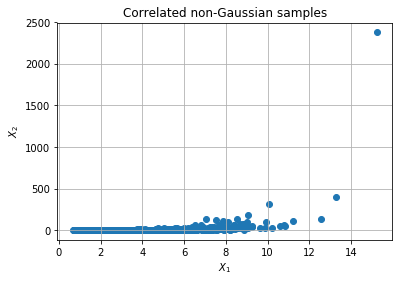

In [4]:
# Example 3: 
#In this example, the class 'InvNataf' is employed to transform the correlated standard normal samples 
#generated in example 1 to  correlated non-Gaussian samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=y, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Correlated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.3156815945396439]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.04216522873920494]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141858]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.002755882367653216]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.000712149910182982]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITA

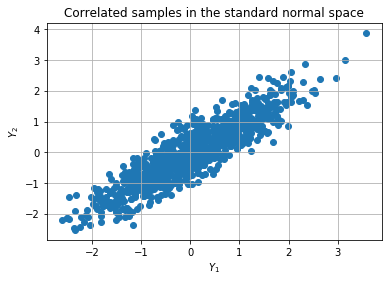

In [5]:
# Example 4:
# In this example, the class 'Nataf' is employed to transform the correlated non-Gaussian samples of example 3 
#back to standard normal samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[1.         0.31649732]
 [0.31649732 1.        ]]


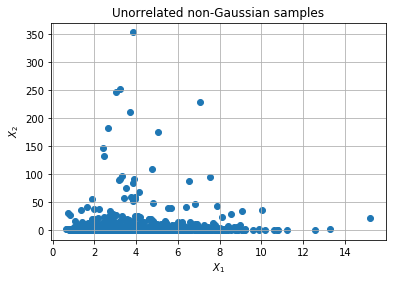

In [6]:
# Example 5:
# Similar to example 3 but with uncorrelated samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=x, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Unorrelated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.3156815945396439]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.04216522873920494]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141858]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.002755882367653216]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.000712149910182982]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITA

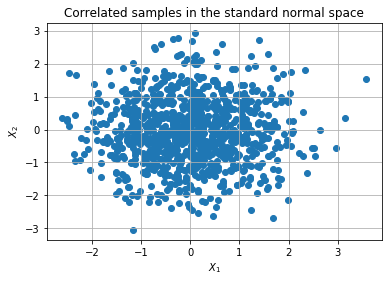

In [7]:
# Example 6:
# Similar to example 4 but with uncorrelated samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.38689906088792]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3868980914480282]
UQpy: ITAM Done.
0
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3586834431005965]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3586618463131934]
UQpy: ITAM Done.
1
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3304711840346348]
UQpy: Computing Nataf correlation distortion...

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.8220154998462809]
UQpy: ITAM Done.
20
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.7956371499474615]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.7941588536408202]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.7937740710450105]
UQpy: ITAM Done.
21
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.7675974024669027]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.7659485575938902]
UQpy: Computing Na

UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.42638937327279436]
UQpy: ITAM Done.
34
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.4054110124318243]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.39941523373951265]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.3984277851542712]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.3981402042410398]
UQpy: ITAM Done.
35
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.3778170261266925]
UQpy: Computing 

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.11608320711393569]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.11565239452645323]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.11549966443747418]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.11543526049968841]
UQpy: ITAM Done.
45
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.10580438765069672]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.0896818528629358]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy

UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.000839417229988389]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.0005764599189016696]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.0003886922310848715]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.00026536815765526914]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.0001796472822351513]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.00012231700673412304]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 8.295812277196389e-05]
UQpy: ITAM Done.
52
UQpy:

UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.0003159513018619719]
UQpy: ITAM Done.
53
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.10308487213049297]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.8609230289215641]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.09917670906362205]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.6862292367049928]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0964719001378251]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQp

UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.17713463554277142]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.08513342423231171]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.2974548962273658]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.10118970069117428]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.5171185244118435]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.11459843123314713]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.8993882104644629]
UQpy: Computing Nataf correlation distortion...

UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.10554796711492405]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.49270237381814397]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.135104185893083]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.10007344285847292]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.07525782195106037]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.21013896480428165]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.10648864791226356]
UQpy: Computing Nataf correlation distorti

UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.5484561652464692]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.15959871908655165]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.08083351900671755]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.07423045599993192]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.201667123232632]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.11959707527044827]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.6352283060031523]
UQpy: Computing Nataf correlation distortion

UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.10428477040277917]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.3968939678428854]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.16806944183842973]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.0961839270577863]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.0910927379158707]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.2952567806156458]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.15414164726138335]
UQpy: Computing Nataf correlation distortion

UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.1935452054094498]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.07362570559538367]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.08293332072724965]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.24346867686960277]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.15919863988148217]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.1376623205472722]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.12218950048031749]
UQpy: Computing Nataf correlation distorti

UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.18409521640687693]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.15360978661962096]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.9745505866602678]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.2457680714542799]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.0072620285212462825]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.012764887275042833]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.02019646333049714]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.6086055659260614]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.24871931836462705]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.01982312674637538]
UQpy: ITAM Done.
61
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.29661256419204735]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.050533001274583184]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.12072199354174452]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['

UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.1826415313165928]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.15770820224544102]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.1724274583463862]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.17089243859820352]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.18024522005285207]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.16082948526158664]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.17433161374914458]
UQpy: Computing Nataf correlation distortion...


UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.11260479914342297]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.4019591406311721]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.2765381622479485]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.03574902283975898]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.06065021314302292]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.15838387612701404]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.1821345339478871]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.2607322003626478]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.24744679650129878]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.0902547818797938]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.13213641072889498]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.5321927143490621]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.3190616126320809]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.015538338277998566]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.37835736799997305]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.09869507611298602]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.32131632490487566]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.28464164018043286]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.049952007277168954]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.08630245657520542]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.26286435242796896]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.15827270057251916]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.2078543426280439]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.14943511957267397]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.20063839608768788]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.1573087368306879]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.20708326957783152]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.1502809721092636]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.20694702021112818]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.15244635181325286]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.2108608478494748]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.1483333003590426]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.2072566254774542]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.15212188368003532]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.2105792622845167]
UQpy: Computing Nataf correlation distortion

UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.18528830980221847]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.24596515643796024]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.11282019521821383]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.1783204219451788]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.18140822229692857]
UQpy: ITAM Done.
69
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.46102599356852014]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
[

UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.16853455293662384]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.7718724585945776]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.47189414140554803]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.15822551890497347]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.6867211484465483]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.4587149661437329]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.13809668585502616]
UQpy: Computing Nataf correlation distortion...
UQ

UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.09651471556731535]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.17274217857221952]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.17942537766932803]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.2655659956741369]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.09423992991422432]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.16962870848981798]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.7711370705383132]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.26865783653078407]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.09001360693312245]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.16763612378678547]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.7463563334635794]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.5074579849639195]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.18312775003929202]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.1665815034348511]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.14052925511294384]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.2441365182947454]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.10621798504520792]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.19897432985759755]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.14413190891732106]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.2484875661820872]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.10247436708604109]
UQpy: Computing Nataf correlation distortion...
U

UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.20242084545071157]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.13602193574425084]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.24394068334075655]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.10204161525559866]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.196977025791792]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.1403822397295523]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.24947243439645786]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.10508191442108115]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.20547546526516586]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.1277771910842568]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.23806651899810982]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.10181293722789199]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.20050587695192018]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.13167198651701323]
UQpy: Computing Nataf correlation distort

UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.2077695538623501]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.11968964817801567]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.23125635388627622]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.10146306625128815]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.20371098254213627]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.12280344404858556]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.235749685133809]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.11625244668653532]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.23447496573616697]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.08581042386222255]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.18424057442963596]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.1227923413194295]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.24445942072919838]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.07828892903479208]
UQpy: Computing Nataf correlation distortion..

UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.14354680750238558]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.14316848846381883]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.27882001755415214]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.045404808527363505]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.10792517608749616]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.3794812159927308]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.5059915228469436]
UQpy: Computing Nataf correlation distort

UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.15678664011719073]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.1252067984192044]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.2565120445069944]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.054827846999860236]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.12939583805731059]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.4861558867277825]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.5786899777886843]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.23788811976327173]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.06026183752452856]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.14245963881892706]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.12561217146371575]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.26121351832220463]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.043640705671552274]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.10681882015329873]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.14735104458485698]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.11276493125819442]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.24378473100716094]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.04768803271744566]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.1171443773218756]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.4264455346525538]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.5713755238881678]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.08146269330231337]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.1894192597982464]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.07542619778419471]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.17743826940411606]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.08330906287127393]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.19302750346230044]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.07304097656227165]
UQpy: Computing Nataf correlation distort

UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.5080702485229276]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.1652724006252701]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.0812410481831179]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.1913605837086818]
UQpy: ITAM Done.
86
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.5641784998675122]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.2166732309112877]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy:

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.03220818550503759]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.08520897060976419]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.29000292235601266]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.5017896506117745]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.17171905571309137]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.056342965585750616]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.14230813659165573]
UQpy: Computing Nataf correlation distortion...

UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.07146602587044878]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.17740623395952748]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.04205895412046369]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.11025081064495848]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.0826808068135161]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.20114460362601272]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.02735831985550089]
UQpy: Computing Nataf correlation distort

UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.20743970046527233]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.41680314384463946]
UQpy: ITAM Done.
90
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.4859706670400317]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.1814802379092957]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.017383773754359656]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.048614173317771445]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['U

UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.11935063709122185]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.28198198579270967]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.0549626339393833]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.17851895917720034]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.38452277233645615]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.12059193791093882]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.04139760937682219]
UQpy: Computing Nataf correlation distortion..

UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.2549176937410963]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.049311288836260125]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.15920064580650756]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.35732803344102965]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.11288375322827132]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.0336228587016791]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.0927988549640407]
UQpy: Computing Nataf correlation distorti

UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.08997570308072832]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.03394998544339884]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.09441994865743564]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.03149207609094278]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.08796303577650036]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.03506157690653755]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.09732171525114311]
UQpy: Computing Nataf correlation distor

UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.0725313296674422]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.03070508663143644]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.0865639280446447]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.023075633898597056]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.06592472446421967]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.03428194049391369]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.0960522482329786]
UQpy: Computing Nataf correlation distorti

UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.025137606917891457]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.07209689130274251]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.017913193558378268]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.052020757100362074]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.028629261619808305]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.0816216807409677]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.012799145585551714]
UQpy: Computing Nataf correlation di

UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.06364671882036228]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.00918615960474534]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.027272459797631217]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.02826656047471854]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.08123604828248367]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.00013684616530491387]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.00041290149745780045]
UQpy: Computing Nataf correlation

UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.009436153018556125]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.051228221857063404]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.16224725820054012]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.06974229217356119]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.020949539036997047]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.004109478993132488]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.012468750246643668]
UQpy: Computing Nataf correlation d

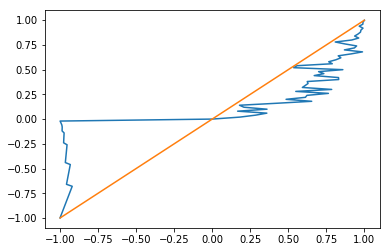

In [8]:
# Example 7:
# Performs the Iterative Translation Approximation Method (ITAM) to estimate the underlying Gaussian 
# correlation from known values of the correlation for lognormal random variables.
# For a range of correlation values from -0.999 to 0.999, estimate the underlying Gaussian correlation 
#that most closely approximates yields the corresponding correlation for Lognormal(0,1) random variables.

w3 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(corr=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 4], [2, 0.0, 4]], itam_error2=0.001)
    w3[i] = ww.corr_norm[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
0
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
1
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
2
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
3
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
4
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
5
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
6
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
7
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
8
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
9
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
10
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
11
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
12
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
13
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
14
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
15
UQ

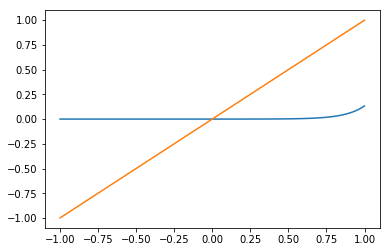

In [9]:
# Example 8:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

w4 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = InvNataf(corr_norm=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 1], [4, 0.0, 1]], dimension=2)
    w4[i] = ww.corr[0, 1]
    print(i)

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()